### All Library Import 

In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('../data_set/newsdata_set.csv')

In [8]:
df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [9]:
df.shape

(209527, 2)

In [10]:
df = df.dropna()

In [11]:
df.shape

(209521, 2)

In [12]:
num_duplicates = df.duplicated().sum()
num_duplicates

1419

In [13]:
df1 = df.drop_duplicates()

In [14]:
df1.shape

(208102, 2)

In [15]:
df1.groupby('category')['category'].agg('count')

category
ARTS               1509
ARTS & CULTURE     1338
BLACK VOICES       4574
BUSINESS           5979
COLLEGE            1144
COMEDY             5343
CRIME              3557
CULTURE & ARTS     1054
DIVORCE            3420
EDUCATION          1014
ENTERTAINMENT     17321
ENVIRONMENT        1372
FIFTY              1401
FOOD & DRINK       6335
GOOD NEWS          1398
GREEN              2617
HEALTHY LIVING     6684
HOME & LIVING      4214
IMPACT             3480
LATINO VOICES      1130
MEDIA              2941
MONEY              1754
PARENTING          8740
PARENTS            3890
POLITICS          35478
QUEER VOICES       6337
RELIGION           2568
SCIENCE            2204
SPORTS             5076
STYLE              2246
STYLE & BEAUTY     9330
TASTE              2095
TECH               2049
THE WORLDPOST      3662
TRAVEL             9875
U.S. NEWS          1377
WEDDINGS           3594
WEIRD NEWS         2777
WELLNESS          17896
WOMEN              3457
WORLD NEWS         3294
WORLDPO

In [16]:
df1 = df1[df1['category'].isin(['SPORTS','TECH','POLITICS','SCIENCE','ENTERTAINMENT','RELIGION','EDUCATION','ENVIRONMENT'])]

In [17]:
df1.head(10)

,headline,category
13,Twitch Bans Gambling Sites After Streamer Scam...,TECH
17,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
20,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT
21,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS
24,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS
26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS
28,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT
30,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS
32,First Public Global Database Of Fossil Fuels L...,ENVIRONMENT
34,Alaska Prepares For 'Historic-Level' Storm Bar...,ENVIRONMENT


In [18]:
df1.shape

(67082, 2)

In [19]:
def headline_convert(df): 
    category_mapping = {
        'SPORTS': '000',
        'TECH': '001',
        'POLITICS': '010',
        'SCIENCE': '011',
        'ENTERTAINMENT': '100',
        'RELIGION': '101',
        'EDUCATION': '110',
        'ENVIRONMENT': '111',       
    }
    for index, row in df.iterrows():
        category = row['category']
        binary_code = category_mapping.get(category)
        if binary_code is not None:
            df.at[index, 'category'] = binary_code

In [20]:
headline_convert(df1)

In [21]:
df1.head(10)

,headline,category
13,Twitch Bans Gambling Sites After Streamer Scam...,001
17,"Maury Wills, Base-Stealing Shortstop For Dodge...",000
20,Golden Globes Returning To NBC In January Afte...,100
21,Biden Says U.S. Forces Would Defend Taiwan If ...,010
24,‘Beautiful And Sad At The Same Time’: Ukrainia...,010
26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",000
28,James Cameron Says He 'Clashed' With Studio Be...,100
30,Biden Says Queen's Death Left 'Giant Hole' For...,010
32,First Public Global Database Of Fossil Fuels L...,111
34,Alaska Prepares For 'Historic-Level' Storm Bar...,111


In [22]:
df1.groupby('category')['category'].agg('count')

category
000     5076
001     2049
010    35478
011     2204
100    17321
101     2568
110     1014
111     1372
Name: category, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test=train_test_split(df1.headline,df1.category,test_size=0.2)

In [25]:
X_train.shape

(53665,)

In [26]:
X_test.shape

(13417,)

In [27]:
X_train.values

array(['Washington State Is Low On Weed For Retail Marijuana Debut',
       'Vandals Topple Statue Of Saint Junipero Serra Who Pope Francis Canonized During His Trip',
       'Estranged Mom And Daughter Reunite, But Will Mom Get Sober?', ...,
       'A Britney Spears Musical Is Happening With A Feminist Fairy-Tale Twist',
       "Grammys Awards Live: Frank Ocean, fun., Mumford & Sons And More Join For Music's Biggest Night (LIVE UPDATES)",
       "Discovery Responds To 'Phelps Vs. Shark' Backlash, Says Real Shark Was Never Promised"],
      dtype=object)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(max_features=20000,stop_words='english')
x_train_count= v.fit_transform(X_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [37]:
clf.fit(x_train_count,y_train)

MultinomialNB()

In [38]:
news=[
    "Star Sports Breaks Silence Over Rohit's 'Breaching His Privacy' Accusation",
    "Head Coach Gary Kirsten Joins Pakistan Team Ahead Of England T20I Series",
    "Google CEO Sundar Pichai on AI-powered search and the future of the web",
    "The five-year journey to make an adventure game out of ink and paper"
]

In [39]:
c=v.transform(news)

In [40]:
clf.predict(c)

array(['000', '000', '001', '100'], dtype='<U3')

In [41]:
x_test_count=v.transform(X_test)
clf.score(x_test_count,y_test)

0.8527986882313483

## DecisionTreeClassifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0)

In [85]:
clf1.fit(x_train_count,y_train)

DecisionTreeClassifier(random_state=0)

In [86]:
clf1.predict(c)

array(['000', '000', '001', '000'], dtype=object)

In [87]:
clf1.score(x_test_count,y_test)

0.7882537079824103

## RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier(n_estimators=40)

In [90]:
rf.fit(x_train_count,y_train)

RandomForestClassifier(n_estimators=40)

In [91]:
rf.predict(c)

array(['000', '000', '001', '001'], dtype=object)

In [92]:
rf.score(x_test_count,y_test)

0.8217932473727361

In [93]:
from sklearn.svm import SVC
model = SVC()

In [94]:
model.fit(x_train_count,y_train)

SVC()

In [95]:
model.score(x_test_count,y_test)

0.8425132294849818

In [96]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
    estimator=MultinomialNB(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train_count, y_train)
bag_model.oob_score_

0.8484673437063263

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
for x in range(10):
  scores1 = cross_val_score(MultinomialNB(),x_train_count, y_train, cv=5*x+5)
  print(np.average(scores1))

0.8475170036336532
0.8496601551939312
0.8510203300291456
0.8513742207518444
0.8520266992977912
0.8520639011541657
0.8523246751148174
0.8520638083997639
0.8523436332871405
0.8521199026034317


In [101]:
from sklearn.metrics import confusion_matrix
Y_test_count= v.fit_transform(X_test.values)
x_test_count.toarray()
y_pred = clf.predict(x_test_count)
cm = confusion_matrix(y_test, y_pred)

Text(58.222222222222214, 0.5, 'Truth')

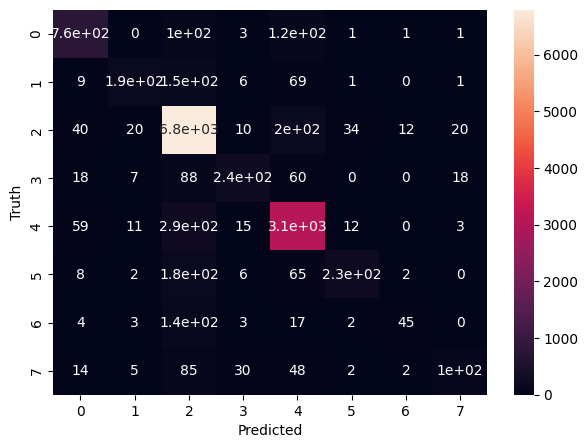

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Here we get the more accurary models using MultinomialNB

## so we choose naive_bayes

#### Gaussian Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

In [104]:
gnb = GaussianNB()
gnb.fit(x_train_count.toarray(),y_train)

GaussianNB()

In [105]:
gnb.score(x_test_count.toarray(),y_test)

0.5570544831184319

####  Complement Naive Bayes

In [106]:
from sklearn.naive_bayes import ComplementNB
clf10 = ComplementNB()

In [107]:
clf10.fit(x_train_count.toarray(),y_train)

ComplementNB()

In [108]:
clf10.score(x_test_count.toarray(),y_test)

0.8622642915703957

####  Bernoulli Naive Bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB
clf11 = BernoulliNB()

In [57]:
clf11.fit(x_train_count.toarray(),y_train)

BernoulliNB()

In [58]:
clf11.score(x_test_count.toarray(),y_test)

0.8217932473727361

#### CategoricalNB

In [109]:
from sklearn.naive_bayes import CategoricalNB
clf12 = CategoricalNB()

In [110]:
clf12.fit(x_train_count.toarray(),y_train)

CategoricalNB()

In [114]:
clf12.predict(c.toarray())

array(['100', '000', '001', '100'], dtype='<U3')

## we choose the ComplementNB under naive_bayes due to high accuracy

### fixing parameter

In [122]:
clf13 = ComplementNB(alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None, norm=False)

In [123]:
clf13.fit(x_train_count.toarray(),y_train)

ComplementNB()

In [124]:
clf13.score(x_test_count.toarray(),y_test)

0.8622642915703957

In [43]:
import pickle

In [55]:
filename = '../model/finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [56]:
model = pickle.load(open('../model/finalized_model.sav', 'rb'))

In [60]:
todaynews=[
    "Orders province head to appoint Congress provincial assembly leader Surendraraj Pandey as chief minister within 48 hours",
    "The country’s cricket governing body has submitted the list of only 14 players to the International Cricket Council (ICC) for the World Cup, leaving one slot for leg spinner Lamichhane",
    "Supreme Court moved demanding suspension of Home Minister Lamichhane",
    "One person was killed in the major metropolitan city of Kolkata when concrete chunks fell on him during the peak of the storm, police said",
    "The exhibit explores timeless fusion of heritage and creativity as Nepal’s century-old mythology unfolds in a captivating tale of fine and contemporary artistry"
]

In [61]:
c1=v.transform(todaynews)

In [62]:
model.predict(c1)

array(['010', '000', '010', '100', '101'], dtype='<U3')